In [31]:
import pandas as pd

In [32]:
df = pd.read_csv('dataset.csv')

In [33]:
df

,id,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,0,26,1,2,0,3,26.783828,48,78,91,1,1
1,1,39,1,4,12,3,25.862694,35,68,80,2,1
2,2,48,0,2,3,2,9.920805,20,67,13,2,0
3,3,34,1,2,5,2,6.407751,36,27,70,3,0
4,4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,1498,48,0,2,4,4,36.299263,9,37,44,2,1


##1

In [34]:
df.isnull().sum()

,0
id,0
Age,0
Gender,0
EducationLevel,0
ExperienceYears,0
PreviousCompanies,0
DistanceFromCompany,0
InterviewScore,0
SkillScore,0
PersonalityScore,0


In [35]:
df.shape[0]

1500

In [36]:
df['HiringDecision'].value_counts()

,count
HiringDecision,
0,1035
1,465


##2

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [38]:
Y = df["HiringDecision"]
X = df.drop(["id", "HiringDecision"], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)

coltran = ColumnTransformer(transformers=[("std", StandardScaler(), ['Age', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies',
                                                                     'DistanceFromCompany', 'InterviewScore', 'SkillScore',
                                                                     'PersonalityScore', 'RecruitmentStrategy'])],
                            remainder='passthrough')

coltran.fit(X_train)
X_train = coltran.transform(X_train)
X_test = coltran.transform(X_test)

# Recuperare i nomi delle colonne trasformate
transformed_features = coltran.named_transformers_['std'].get_feature_names_out()
output_columns = list(transformed_features) + ["Gender"]

X_train = pd.DataFrame(X_train, columns=output_columns)
X_test = pd.DataFrame(X_test, columns=output_columns)

##3

In [39]:
model = SGDClassifier(random_state=123)
model.fit(X_train, Y_train)

trainpred = model.predict(X_train)
testpred = model.predict(X_test)

print(f"F1-score on train {f1_score(Y_train, trainpred)}")
print(f"F1-score on test {f1_score(Y_test, testpred)}")
print("Confusion matrix on test")
print(confusion_matrix(Y_test, testpred))

F1-score on train 0.7370030581039755
F1-score on test 0.7186147186147186
Confusion matrix on test
[[227  32]
 [ 33  83]]


In [40]:
model.coef_

array([[ 0.6708708 ,  1.22738944,  0.8520273 ,  0.13260799, -0.53238017,
         0.86924477,  0.84191251,  0.08581707, -3.31732717, -0.96854176]])

In [41]:
model.feature_names_in_

array(['Age', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies',
       'DistanceFromCompany', 'InterviewScore', 'SkillScore',
       'PersonalityScore', 'RecruitmentStrategy', 'Gender'], dtype=object)

##4

In [42]:
Y = df["HiringDecision"]
X = df.drop(["id", "HiringDecision"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)

coltran.fit(X_train)
X_train = coltran.transform(X_train)
X_test = coltran.transform(X_test)

X_train = pd.DataFrame(X_train, columns=output_columns)
X_test = pd.DataFrame(X_test, columns=output_columns)

model = SGDClassifier(random_state=123)
model.fit(X_train, y_train)
res = model.predict(X_test)
X_test['pred'] = res

In [43]:
uomo = X_test[X_test['Gender']==0]
donna = X_test[X_test['Gender']==1]

prob_uomo = uomo[uomo['pred']==0].shape[0] / uomo.shape[0]
prob_donna = donna[donna['pred']==0].shape[0] / donna.shape[0]

print('Probabilità che un uomo non sia assunto: {}'.format(prob_uomo))
print('Probabilità che una donna non sia assunta: {}'.format(prob_donna))

Probabilità che un uomo non sia assunto: 0.6842105263157895
Probabilità che una donna non sia assunta: 0.7027027027027027


In [44]:
X_test['real'] = y_test.values

print('F1-score sugli uomini: {}'.format(f1_score(X_test[X_test['Gender']==0]['real'], uomo['pred'])))
print('F1-score sulle donne: {}'.format(f1_score(X_test[X_test['Gender']==1]['real'], donna['pred'])))

F1-score sugli uomini: 0.6964285714285714
F1-score sulle donne: 0.7394957983193278


In [45]:
pip install fairlearn

In [46]:
from fairlearn.metrics import demographic_parity_ratio

In [47]:
Y = df["HiringDecision"]
X = df.drop(["id", "HiringDecision"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)

coltran.fit(X_train)
X_train = coltran.transform(X_train)
X_test = coltran.transform(X_test)

X_train = pd.DataFrame(X_train, columns=output_columns)
X_test = pd.DataFrame(X_test, columns=output_columns)

model = SGDClassifier(random_state=123)
model.fit(X_train, Y_train)


demographic_parity_ratio(Y_test, model.predict(X_test), sensitive_features=X_test["Gender"])

np.float64(0.9414414414414416)

In [48]:
prob_uomo = model.predict(X_test[X_test['Gender']==0]).sum()/len(model.predict(X_test[X_test['Gender']==0]))

In [49]:
prob_donna = model.predict(X_test[X_test['Gender']==1]).sum()/len(model.predict(X_test[X_test['Gender']==1]))

In [50]:
if prob_uomo<prob_donna:
  print(prob_uomo/prob_donna)
else:
  print(prob_donna/prob_uomo)

0.9414414414414416


In [51]:
Y = df["HiringDecision"]
X = df.drop(["id", "Gender", "HiringDecision"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)

coltran.fit(X_train)
X_train = coltran.transform(X_train)
X_test = coltran.transform(X_test)

output_columns_without_gender = output_columns.copy().remove('Gender')
X_train = pd.DataFrame(X_train, columns=output_columns_without_gender)
X_test = pd.DataFrame(X_test, columns=output_columns_without_gender)

model = SGDClassifier(random_state=123)
model.fit(X_train, y_train)

f1_score(y_test, model.predict(X_test))

0.6987951807228916

## 5

/tmp/ipython-input-4099418976.py:35: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(f1_scores, labels=feature_names)


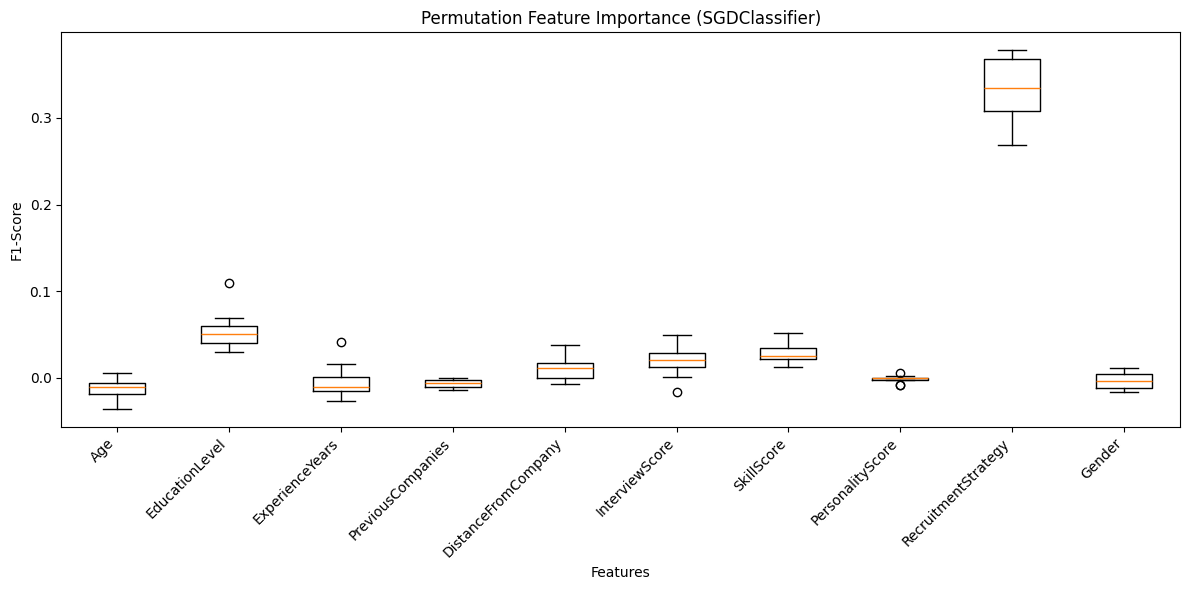

In [30]:
import matplotlib.pyplot as plt

Y = df["HiringDecision"]
X = df.drop(["id", "HiringDecision"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)

coltran.fit(X_train)
X_train = coltran.transform(X_train)
X_test = coltran.transform(X_test)

X_train = pd.DataFrame(X_train, columns=output_columns)
X_test = pd.DataFrame(X_test, columns=output_columns)

model = SGDClassifier(random_state=123)
model.fit(X_train, y_train)

feature_names = X_test.columns
n_permutations = 10
f1_scores = []

for feature in feature_names:
    feature_scores = []
    f1_origin = f1_score(y_test, model.predict(X_test))
    for _ in range(n_permutations):
        X_test_permuted = X_test.copy()
        X_test_permuted[feature] = np.random.permutation(X_test_permuted[feature])
        f1_permuted = f1_score(y_test, model.predict(X_test_permuted))
        feature_scores.append(f1_origin - f1_permuted)
    f1_scores.append(feature_scores)


# Boxplot visualization
plt.figure(figsize=(12, 6))
plt.boxplot(f1_scores, labels=feature_names)
plt.title('Permutation Feature Importance (SGDClassifier)')
plt.xlabel('Features')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# plt.axhline(y=f1_origin, color='r', linestyle='--', label='Baseline (Full Dataset F1-score)')
plt.show()

##2.6

In [23]:
Y = df["HiringDecision"]
X = df.drop(["id", "HiringDecision"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)

coltran.fit(X_train)
X_train = coltran.transform(X_train)
X_test = coltran.transform(X_test)

X_train = pd.DataFrame(X_train, columns=output_columns)
X_test = pd.DataFrame(X_test, columns=output_columns)

model = SGDClassifier(random_state=123)
model.fit(X_train, y_train)
f1_fulldataset = f1_score(y_test, model.predict(X_test))

feature_names = X_test.columns
f1_features = {}

for feature in feature_names:
    model.fit(X_train.drop(feature, axis=1), y_train)
    f1_features[feature] = f1_score(y_test, model.predict(X_test.drop(feature, axis=1)))

f1_features

{'Age': 0.7381974248927039,
 'EducationLevel': 0.6893617021276596,
 'ExperienceYears': 0.744,
 'PreviousCompanies': 0.7542372881355932,
 'DistanceFromCompany': 0.6846153846153846,
 'InterviewScore': 0.5664739884393064,
 'SkillScore': 0.6695652173913044,
 'PersonalityScore': 0.717948717948718,
 'RecruitmentStrategy': 0.3958333333333333,
 'Gender': 0.6987951807228916}

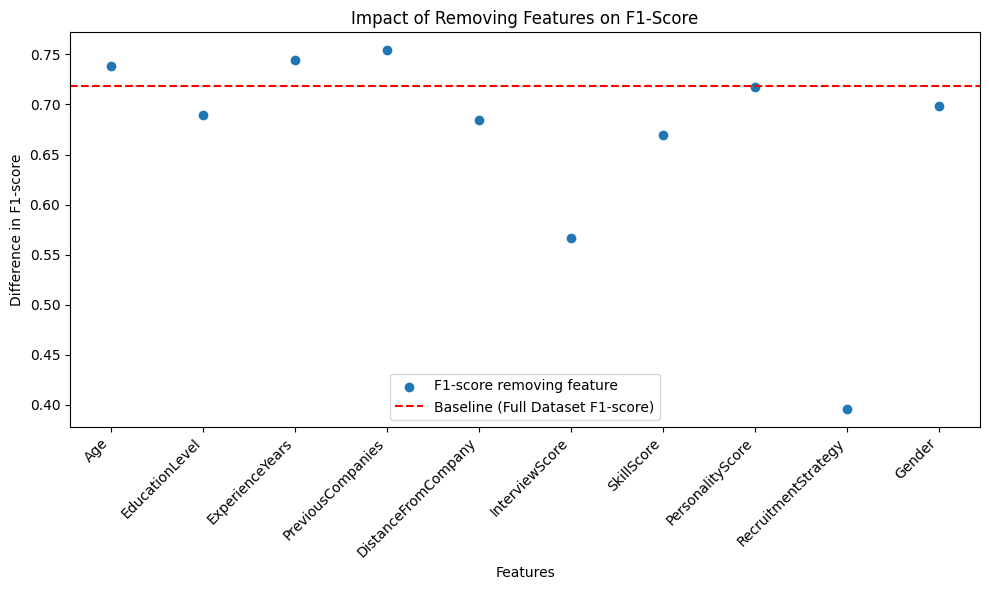

In [24]:
features = list(f1_features.keys())
f1_drops = list(f1_features.values())

plt.figure(figsize=(10, 6))
plt.scatter(features, f1_drops, label='F1-score removing feature')
plt.axhline(y=f1_fulldataset, color='r', linestyle='--', label='Baseline (Full Dataset F1-score)')

plt.xlabel("Features")
plt.ylabel("Difference in F1-score")
plt.title("Impact of Removing Features on F1-Score")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()